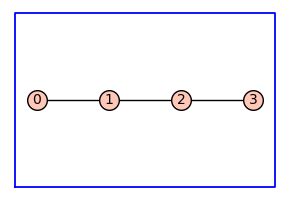

In [1]:
G = graphs.PathGraph(4)
G.show(figsize=3,graph_border=True)

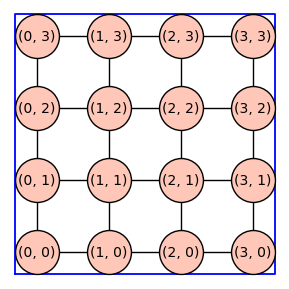

In [2]:
GG = G.cartesian_product(G)
pos = {v: v for v in GG.vertices(sort=True)}
GG.set_pos(pos)
GG.show(figsize=4,vertex_size=1000,graph_border=True)

In [3]:
G2 = GG.copy()
for v in G2.vertices(sort=True):
    for u in G2.vertices(sort=True):
        sv=tuple(sorted(v))
        su=tuple(sorted(u))
        if v!=u and sv==su and v<u and G2.has_vertex(v) and G2.has_vertex(u):
            G2.merge_vertices([v,u])

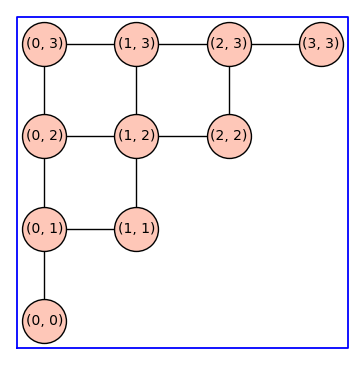

In [4]:
G2.show(figsize=5,vertex_size=1000,graph_border=True)

In [5]:
def reduced_Cartesian_square(G):
    GG = G.cartesian_product(G)
    G2 = GG.copy()
    for v in G2.vertices(sort=True):
        for u in G2.vertices(sort=True):
            sv=tuple(sorted(v))
            su=tuple(sorted(u))
            if v!=u and sv==su and v<u and G2.has_vertex(v) and G2.has_vertex(u):
                G2.merge_vertices([v,u])
    return G2

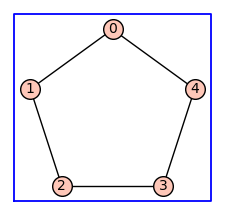

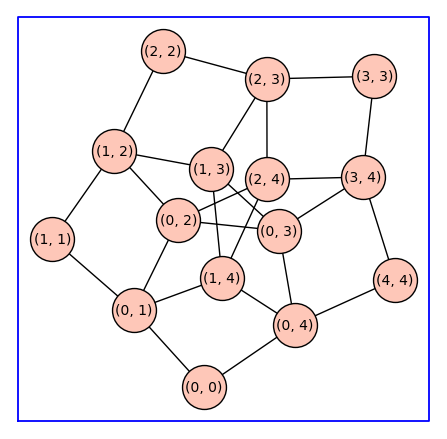

In [6]:
G = graphs.CycleGraph(5)
G.show(figsize=3,graph_border=True)
G2 = reduced_Cartesian_square(G)
G2.show(figsize=6,vertex_size=1000,graph_border=True)


In [7]:
def Cartesian_power(G, k=2):
    # Make Cartesian power G^k (unreduced)
    Gk=G.copy()
    for i in range(k-1):
        Gk = Gk.cartesian_product(G)
    # Make each vertex a tuple
    vflat=list(range(Gk.order()));
    for i in range(Gk.order()):
        v=Gk.vertices(sort=True)[i]
        vflat[i]=tuple(flatten(v))
    Gk.relabel(vflat)
    return Gk

In [8]:
GGG = Cartesian_power(graphs.PathGraph(4),3)
GGG.show3d()

Graphics3d Object

In [9]:
def reduced_Cartesian_power(G, k=2):
    Gk = Cartesian_power(G, k)
    for v in Gk.vertices(sort=True):
        for u in Gk.vertices(sort=True):
            sv=tuple(sorted(v))
            su=tuple(sorted(u))
            if v!=u and sv==su and v<u and Gk.has_vertex(v) and Gk.has_vertex(u):
                Gk.merge_vertices([v,u])
    return Gk

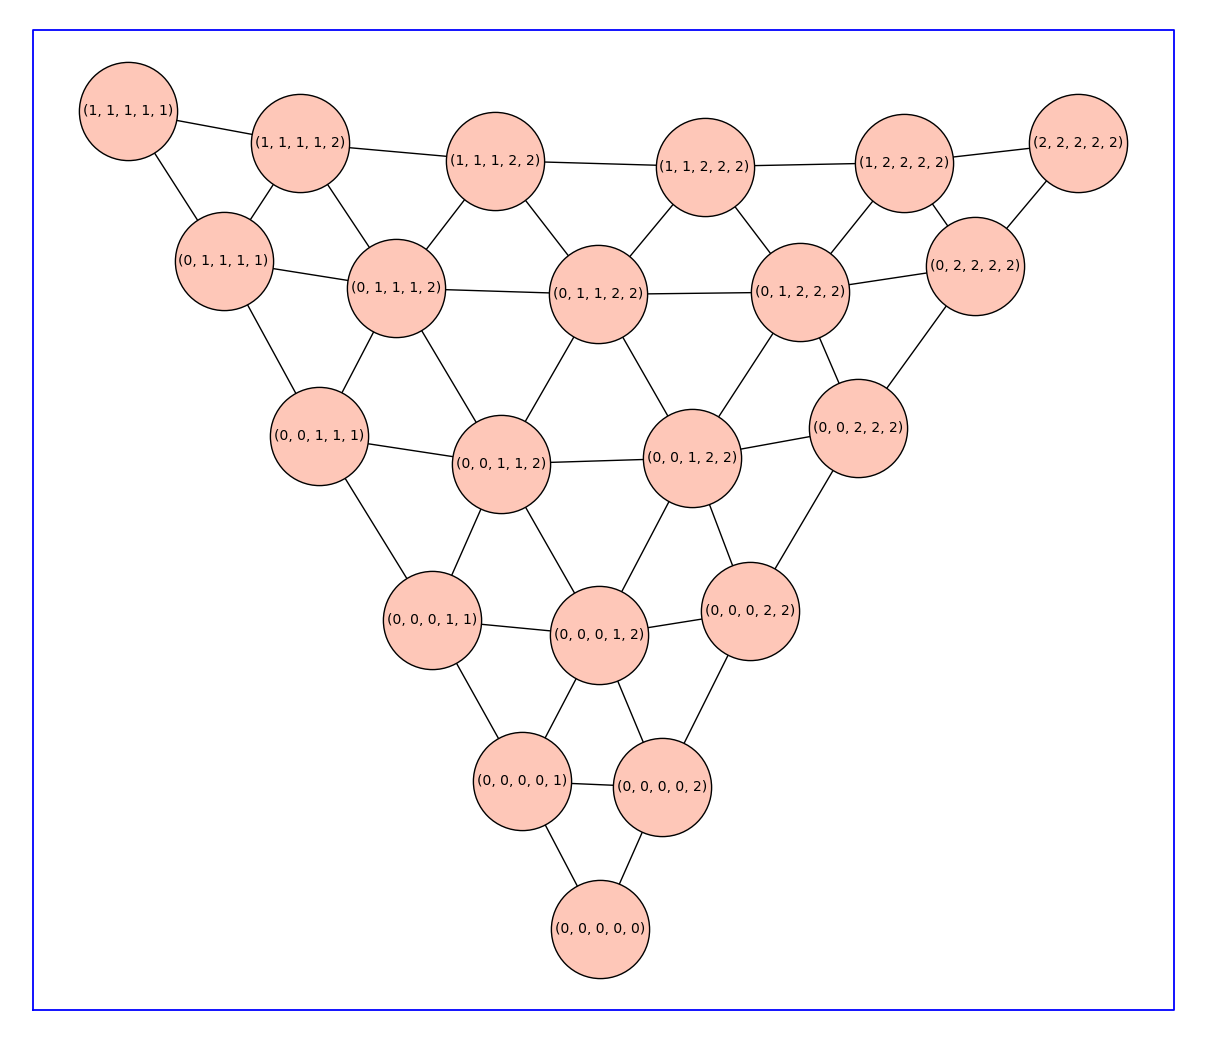

In [10]:
G3 = reduced_Cartesian_power(graphs.CycleGraph(3),5)
G3.show(figsize=14,vertex_size=5000,graph_border=True)